## Principal Component Analysis

In [59]:
import numpy as np
import pandas as pd
from scipy.linalg import eigh
import matplotlib.pyplot as plt

The convariance matrix is defined as
$$
C = \frac{1}{n} \sum_{i=1}^{n} x_i x_i^T
$$
with $x_i$ data in the sample.

In [60]:
df = pd.read_csv('/home/patchouli/AMS/595/Hw5/data.csv')
data = df.to_numpy()
print(np.average(data[:,1]))
cov = np.cov(data, rowvar=False)
print('Covariance matrix is \n', cov)

0.08201297074783735
Covariance matrix is 
 [[1.02608749 0.11769063]
 [0.11769063 1.08134929]]


We want to find a direction in the parameter space on which the projection of the dataset has the largest variance. By optimize
$$
D(x) = w^T C w
$$,
we find the expected $w$ vector is exactly the eigenvalue of covariance corresponding to the largest eigenvalue.

In [61]:
eigs, vects = eigh(cov)
print('Eigenvalues are \n', eigs)
print('Eigenvectors are \n', vects)
principal = np.argsort(eigs)[-1]
principal_comp = vects.T[principal] 

Eigenvalues are 
 [0.93282774 1.17460905]
Eigenvectors are 
 [[-0.78376051  0.62106317]
 [ 0.62106317  0.78376051]]


We can project the 2D dataset onto the direction of principal component, which is a 1D line

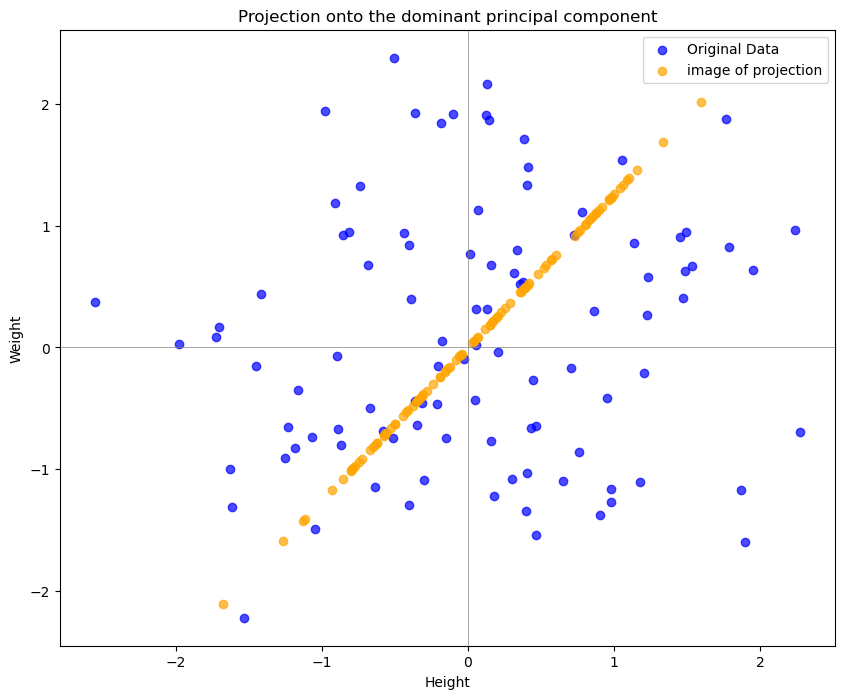

In [63]:
# Projection by inner produxt
projected_data = principal_comp @ data.T
# Recover the image of the prohection by outer product
image = np.outer(projected_data, principal_comp)

plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.7, label='Original Data', color='blue')
plt.scatter(image[:, 0], image[:, 1], color='orange', alpha=0.7, label='image of projection')

plt.title('Projection onto the dominant principal component')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend()
plt.show()